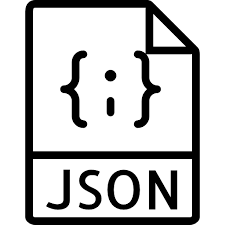

# Learning Objectives

- Load and explore a .json file in Python
- Create a clean data structure from a .json file
- Conduct descriptive analysis
- Visualize the results

Part of being a good data scientist is having the capacity to work with data in many different forms. Much data online is stored in JSON format. So let's see if we can conduct a descriptive analysis of data when it's given to us in that form!

## What is JSON?

JSON stands for Java Script Object Notation. 

JSON objects are one common way that data is transmitted over the web.  It is notable for being lightweight, which makes it [preferred](https://stackoverflow.com/questions/383692/what-is-json-and-why-would-i-use-it), generally, over XML.

```json
{"menu": {
  "id": 12412,
  "istest": true,
  "value": "File",
  "popup": {
    "menuitem": [
      {"value": "New", "onclick": "CreateNewDoc()"},
      {"value": "Open", "onclick": "OpenDoc()"},
      {"value": "Close", "onclick": "CloseDoc()"}
    ]
  }
}}
```

## JSON Format

JSON objects store data in a format similar to a nested Python dictionary. The JSON format makes it easy to store as a file, transfer between users, and use in other languages.

For more information about the syntax of JSON files, check out this [link](https://www.json.org/json-en.html) to the JSON website.

Can have these types in it (all relatable to Python types):

|JavaScript|JS Example               |Python Equivalent|Python Example           |
|----------|-------------------------|-----------------|-------------------------|
|Objects   |`{'key0':'v12','v':1}`   |Dictionaries     |`{'key0':'v12','v':1}`   |
|Arrays    |`[1, 'one', 'two', 3, 5]`|Lists            |`[1, 'one', 'two', 3, 5]`|
|Strings   |`'One'` or `"Two"`       |Strings          |`'One'` or `"Two"`       |
|Numbers   |`1234.5` or `8675309`    |Numbers          |`1234.5` or `8675309`    |  
|Boolean   |`true` or `false`        |Boolean          |`True` or `False`        |
|Null Value|`null`                   |None Value       |`None`                   |

# Loading a JSON File

For this example, we've created a `new_releases.json` file containing data on 20 newly released music albums. We got this from the Spotify API - we'll explain what this means later. 

Let's begin by importing the `json` package, opening a file with python's `open()` function, and then loading that data from the JSON file into a new `data` object.

In [4]:
# We'll need to import the json package first
import json

In [2]:
# Now use with open to load the file
with open('data/new_releases.json') as file:
    data = json.load(file)

In [6]:
open_file = open('data/new_releases.json')
data = json.load(open_file)
open_file.close()

In [7]:
type(data)

dict

The Spotify API returned the data in the form of JSON object, which the `json` module transforms into a Python object.

## Exploring JSON Schemas  

Recall that JSON files have a nested structure. The deepest levels of our object will contain individual values: numbers, booleans or strings. These in turn will be stored in the equivalents of Python lists and dictionaries, usually with many levels of nesting. 

If you try to look at a raw JSON file, you will likely have a hard time understanding the structure. To more easily make sense of it, we will proceed through each level methodically.

In [8]:
# This will look messy
print(data)

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20', 'items': [{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'}, 'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i', 'id': '1RyvyyTE3xzB2ZywiAwp0i', 'name': 'Future', 'type': 'artist', 'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/4bNPOFOzxGhF5jhfIK6lit'}, 'href'

In [9]:
# One way to make it easier to read
print(json.dumps(data, indent=4))

{
    "albums": {
        "href": "https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20",
        "items": [
            {
                "album_type": "album",
                "artists": [
                    {
                        "external_urls": {
                            "spotify": "https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i"
                        },
                        "href": "https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i",
                        "id": "1RyvyyTE3xzB2ZywiAwp0i",
                        "name": "Future",
                        "type": "artist",
                        "uri": "spotify:artist:1RyvyyTE3xzB2ZywiAwp0i"
                    }
                ],
                "available_markets": [
                    "AD",
                    "AE",
                    "AR",
                    "AT",
                    "AU",
                    "BE",
                    "BG",
                    "BH",
                 

In [11]:
# Using the default Jupyter Notebook's display() helps
display(data) 
# Uncomment this to do the same as just displaying the last line
data

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20',
  'items': [{'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
      'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
      'id': '1RyvyyTE3xzB2ZywiAwp0i',
      'name': 'Future',
      'type': 'artist',
      'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
    'available_markets': ['AD',
     'AE',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JO',
     'JP',
     'KW',
     'LB',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20',
  'items': [{'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
      'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
      'id': '1RyvyyTE3xzB2ZywiAwp0i',
      'name': 'Future',
      'type': 'artist',
      'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
    'available_markets': ['AD',
     'AE',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JO',
     'JP',
     'KW',
     'LB',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     

To start exploring, let's check the type of our new `data` object and start mapping out the hierarchy.

In [12]:
# How can we access the keys?
data.keys()

dict_keys(['albums'])

In this case, there is only a single key, 'albums', so we'll continue on down the pathway exploring and mapping out the hierarchy. Once again, let's start by checking the type of this nested data structure.

In [13]:
type(data.get('albums'))

dict

In [15]:
data.get('albums').keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

At this point, things are starting to look something like this: 

![](images/json_diagram1.jpg)

If we were to continue checking individual data types, we'd have a lot to go through. To simplify this, let's use a `for` loop:

In [22]:
for key, value in data['albums'].items():
    print(type(value))

<class 'str'>
<class 'list'>
<class 'int'>
<class 'str'>
<class 'int'>
<class 'NoneType'>
<class 'int'>


Adding this to our diagram, we now have something like this:

![](images/json_diagram2.jpg)

Let's look at the `items` list - this contains the album information. 

In [17]:
type(data['albums']['items'])

list

In [18]:
data['albums']['items'][0]

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
   'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
   'id': '1RyvyyTE3xzB2ZywiAwp0i',
   'name': 'Future',
   'type': 'artist',
   'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
 'available_markets': ['AD',
  'AE',
  'AR',
  'AT',
  'AU',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'SA',
  'SE',
  'SG',
  'SK',
  'SV',
  'TH',
  'TN',
  'TR',
  'TW',
  'US',
  'UY',
  'VN',
  'ZA'],
 'external_urls': 

In [ ]:
# How can I grab the first entry?
None

We access values as we would for nested lists or dictionaries in Python.

In [24]:
data['albums']['items'][0].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [25]:
# Lets get the artist name
data['albums']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
  'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
  'id': '1RyvyyTE3xzB2ZywiAwp0i',
  'name': 'Future',
  'type': 'artist',
  'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}]

In [ ]:
# Name of 2nd artist
None

# Loading in Plant Data

Now that we have a handle on how to deal with data in JSON form, let's load in a new dataset and construct an analysis!

In [27]:
with open('data/plants.json') as file:
    plants = json.load(file)

This dataset was gathered with the [Trefle API](https://docs.trefle.io/). It contains information about 1000 plants in JSON form.

In [28]:
type(plants)

list

In [30]:
# How many entries should we have? We can sanity check
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

## What Information Do We Have?

Let's take a look at the first plant in our list to see what information is available.

In [32]:
# First plant
plants[0].keys()

dict_keys(['id', 'common_name', 'slug', 'scientific_name', 'year', 'bibliography', 'author', 'status', 'rank', 'family_common_name', 'genus_id', 'image_url', 'synonyms', 'genus', 'family', 'links'])

You can find more information about these fields [here](https://docs.trefle.io/docs/advanced/plants-fields).

## Plant Families

Let's start by seeing what botanical families are represented in our data. We'll build a dictionary that counts the plants by family. We'll use the common names for this purpose.

In [31]:
# Let's use a default dict for this - need to import it first!
from collections import defaultdict

In [33]:
plant_dict = defaultdict(int)

In [35]:
plant_dict

defaultdict(int, {})

In [36]:
family_names = [plant['family_common_name'] for plant in plants]
family_names

['Beech family',
 'Nettle family',
 'Grass family',
 'Plantain family',
 'Beech family',
 'Grass family',
 'Buttercup family',
 'Grass family',
 'Pea family',
 'Olive family',
 'Rose family',
 'Pea family',
 'Buttercup family',
 'Birch family',
 'Beech family',
 'Rush family',
 'Buckwheat family',
 'Grass family',
 'Rose family',
 'Soapberry family',
 'Plantain family',
 'Grass family',
 'Pine family',
 'Pea family',
 'Grass family',
 'Mint family',
 'Rose family',
 'Madder family',
 None,
 'Grass family',
 'Pink family',
 'Birch family',
 'Grass family',
 'Birch family',
 'Carrot family',
 'Geranium family',
 'Grass family',
 'Rose family',
 'Grass family',
 'Mint family',
 'Grass family',
 'Grass family',
 None,
 'Rose family',
 'Aster family',
 'Aster family',
 'Beech family',
 'Carrot family',
 'Carrot family',
 'Aster family',
 'Horsetail family',
 'Rose family',
 'Pine family',
 'Grass family',
 'Plantain family',
 'Heath family',
 'Loosestrife family',
 'Grass family',
 'Aster f

In [37]:
len(family_names)

1000

In [39]:
unique_family_names = set(family_names)

In [41]:
plant_dict2 = {name: 0 for name in unique_family_names}
plant_dict2

{'Grape family': 0,
 'Gentian family': 0,
 'Pea family': 0,
 'Lily family': 0,
 'Amaranth family': 0,
 'Borage family': 0,
 'Sandalwood family': 0,
 'Bladderwort family': 0,
 'Myrtle family': 0,
 'Holly family': 0,
 'Currant family': 0,
 'Horsetail family': 0,
 'Dogbane family': 0,
 'Cucumber family': 0,
 'Birch family': 0,
 'Buckthorn family': 0,
 'Soapberry family': 0,
 'Potato family': 0,
 'Acanthus family': 0,
 'Hemp family': 0,
 'Touch-me-not family': 0,
 'Primrose family': 0,
 'Carrot family': 0,
 'Bittersweet family': 0,
 'Nettle family': 0,
 'Pink family': 0,
 'Evening Primrose family': 0,
 'Birthwort family': 0,
 'Flax family': 0,
 'Spike-moss family': 0,
 'Arum family': 0,
 'Water Milfoil family': 0,
 'Flowering Rush family': 0,
 'Rose family': 0,
 'Iris family': 0,
 'Pittosporum family': 0,
 'Purslane family': 0,
 'Milkwort family': 0,
 'Rock-rose family': 0,
 'Honeysuckle family': 0,
 'Rush family': 0,
 'Buttercup family': 0,
 'Mint family': 0,
 'Brachythecium moss family':

In [43]:
for plant in plants:
    plant_dict[plant['family_common_name']] += 1

In [44]:
plant_dict

defaultdict(int,
            {'Beech family': 10,
             'Nettle family': 2,
             'Grass family': 81,
             'Plantain family': 25,
             'Buttercup family': 21,
             'Pea family': 63,
             'Olive family': 5,
             'Rose family': 49,
             'Birch family': 7,
             'Rush family': 19,
             'Buckwheat family': 17,
             'Soapberry family': 7,
             'Pine family': 10,
             'Mint family': 45,
             'Madder family': 9,
             None: 113,
             'Pink family': 31,
             'Carrot family': 29,
             'Geranium family': 10,
             'Aster family': 80,
             'Horsetail family': 7,
             'Heath family': 17,
             'Loosestrife family': 2,
             'Bracken Fern family': 1,
             'Mustard family': 29,
             'Evening Primrose family': 10,
             'Willow family': 3,
             'Polypody family': 7,
             'Dogwood family':

In [46]:
for plant in plants:
    plant_dict2[plant['family_common_name']] += 1
plant_dict2

{'Grape family': 4,
 'Gentian family': 12,
 'Pea family': 126,
 'Lily family': 4,
 'Amaranth family': 12,
 'Borage family': 26,
 'Sandalwood family': 2,
 'Bladderwort family': 4,
 'Myrtle family': 4,
 'Holly family': 2,
 'Currant family': 8,
 'Horsetail family': 14,
 'Dogbane family': 6,
 'Cucumber family': 2,
 'Birch family': 14,
 'Buckthorn family': 6,
 'Soapberry family': 14,
 'Potato family': 14,
 'Acanthus family': 2,
 'Hemp family': 2,
 'Touch-me-not family': 6,
 'Primrose family': 24,
 'Carrot family': 58,
 'Bittersweet family': 4,
 'Nettle family': 4,
 'Pink family': 62,
 'Evening Primrose family': 20,
 'Birthwort family': 2,
 'Flax family': 4,
 'Spike-moss family': 2,
 'Arum family': 16,
 'Water Milfoil family': 6,
 'Flowering Rush family': 2,
 'Rose family': 98,
 'Iris family': 2,
 'Pittosporum family': 4,
 'Purslane family': 2,
 'Milkwort family': 4,
 'Rock-rose family': 10,
 'Honeysuckle family': 18,
 'Rush family': 38,
 'Buttercup family': 42,
 'Mint family': 90,
 'Brachyt

In [47]:
# How many beech?
plant_dict['Beech family']

10

Are there any missing values?

In [48]:
plant_dict[None]

113

Let's remove these by using a dictionary comprehension:

In [78]:
fams_clean = {plant: num for plant, num in plant_dict.items() if (plant != None)}

In [79]:
# Check to make sure
fams_clean.get(None)
fams_clean.get(None, 0)

0

Let's also remove the families whose counts are less than ten:

In [80]:
fams_clean = {fam: num for fam, num in fams_clean.items() if num >= 10}

Now we can make a bar chart of the numbers:

In [81]:
# Need to import matplotlib first
import matplotlib.pyplot as plt

In [82]:
plt.style.use('seaborn')

/var/folders/9n/kzdbb24d6718p004k3bbjtr40000gn/T/ipykernel_22543/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [84]:
fam_names = list(fams_clean.keys())
print(fam_names)
fam_counts = list(fams_clean.values())
print(fam_counts)

['Beech family', 'Grass family', 'Plantain family', 'Buttercup family', 'Pea family', 'Rose family', 'Rush family', 'Buckwheat family', 'Pine family', 'Mint family', 'Pink family', 'Carrot family', 'Geranium family', 'Aster family', 'Heath family', 'Mustard family', 'Evening Primrose family', 'Sedge family', 'Borage family', 'Primrose family', 'Spurge family', 'Broom-rape family', 'Tape-grass family']
[10, 81, 25, 21, 63, 49, 19, 17, 10, 45, 31, 29, 10, 80, 17, 29, 10, 41, 13, 12, 10, 10, 10]


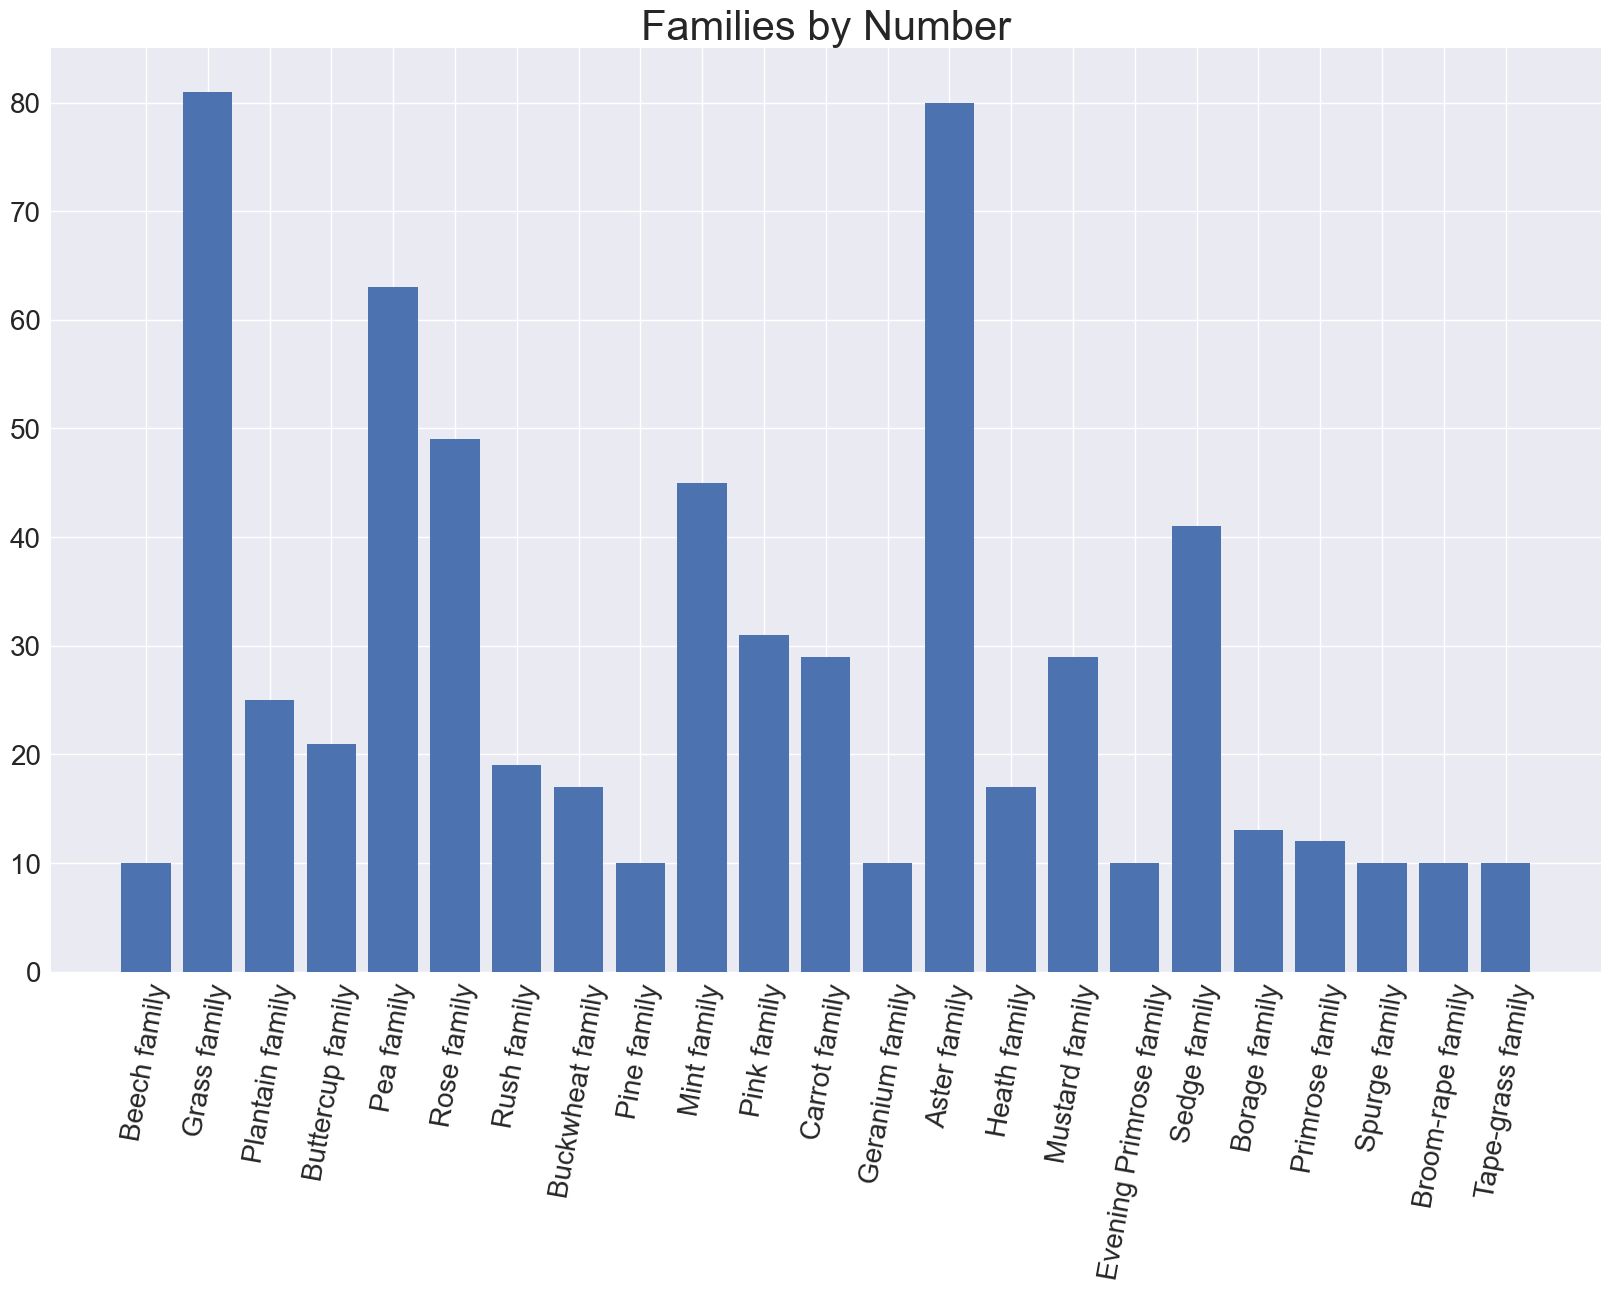

In [85]:
fig, ax = plt.subplots(figsize=(20, 12))

ax.bar(x=fam_names, height=fam_counts)
ax.set_title('Families by Number', fontsize=30)
plt.xticks(rotation=80, fontsize=20)
plt.yticks(fontsize=20);

## Synonyms

Suppose we wanted to know how many synonymous names were listed for each plant. We could grab this number with a list comprehension:

In [93]:
num_syn = [len(plant['synonyms']) for plant in plants]

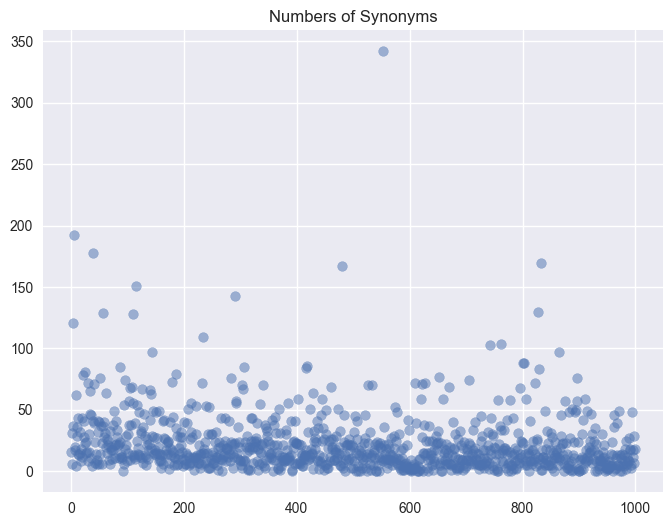

In [87]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(range(1000), num_syn, alpha=0.5)
ax.set_title('Numbers of Synonyms');

## Exercise

One plant has nearly 350 synonynms! What plant is this?

In [94]:
num_syn = max(num_syn)

num_syn

342

<details>
    <summary>
        Answer
    </summary>

```python
[plant for plant in plants if len(plant['synonyms']) > 300]
```
</details>

## Bibliography

In [95]:
biblios = [plant['bibliography'] for plant in plants]

In [96]:
biblios[0]

'Encycl. 1: 723 (1785)'

Let's check the bibliographies for any explicit mention of Linnaeus, the godfather of biological taxonomy. First we'll remove the plants with no bibliography:

In [97]:
hasbiblio = [plant for plant in plants if plant['bibliography'] != None]

In [98]:
len(hasbiblio)

994

In [99]:
linnaeans = [plant['bibliography'] for plant in hasbiblio if 'Linnaeus' in plant['bibliography']]
linnaeans

['Linnaeus, C. (1753). Species plantarum, exhibentes plantas rite cognitas ad genera relatas cum differentiis specificis, nominibus trivialibus, synonymis selectis, locis natalibus, secundum systema sexuale digestas. Stockholm.']

# Matching Author and Bibliography

In fact, _Species Plantarum_ (1753) was written by Linnaeus, and "Sp. Pl." in these bibliographies is a reference to that master work. Let's check to see who the author is for these records whose bibliographies start with "Sp. Pl.":

In [111]:
sps = [plant for plant in hasbiblio if 'Sp. Pl.' in plant['bibliography']]
len(sps)
sps[0]

{'id': 190500,
 'common_name': 'Stinging nettle',
 'slug': 'urtica-dioica',
 'scientific_name': 'Urtica dioica',
 'year': 1753,
 'bibliography': 'Sp. Pl.: 984 (1753)',
 'author': 'L.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Nettle family',
 'genus_id': 1028,
 'image_url': 'https://bs.plantnet.org/image/o/85256a1c2c098e254fefe05040626a4df49ce248',
 'synonyms': ['Urtica major',
  'Urtica tibetica',
  'Urtica sicula',
  'Urtica eckloniana',
  'Urtica haussknechtii',
  'Urtica submitis'],
 'genus': 'Urtica',
 'family': 'Urticaceae',
 'links': {'self': '/api/v1/species/urtica-dioica',
  'plant': '/api/v1/plants/urtica-dioica',
  'genus': '/api/v1/genus/urtica'}}

In [107]:
sp_authors = [sp['author'] for sp in sps]

In [108]:
uniq_auth = set(sp_authors)

In [109]:
counts = []
for author in uniq_auth:
    counts.append(sp_authors.count(author))

In [110]:
dict(zip(uniq_auth, counts))

{'A.Haines (Linnaeus)': 1,
 'Willd.': 1,
 None: 1,
 'L.': 442,
 '(J.Presl & C.Presl) Parl.': 1,
 '(L.) L.': 2}

In [ ]:
# Could do this another way as well, maybe a dictionary comprehension?
None

## Exercise

Change the author to 'L.' (for 'Linnaeus') for all of these records.

<details>
    <summary>
        Answer
    </summary>

```python
for plant in plants:
    try:
        if plant['bibliography'].startswith('Sp. Pl.'):
            plant['author'] = 'L.'
    except:
        continue
```
</details>

# Teaser: Bringing in `pandas`: Back to Synonyms

Let's take advantage of the DataFrame tools from `pandas`:

In [ ]:
# Need to first import pandas
import pandas as pd

In [ ]:
plants_df = pd.DataFrame(plants)

In [ ]:
plants_df.head()

## Exercises for Later

1. Add the number of synonyms as a new column called "num_syn".
2. Sort the DataFrame by number of synonyms in descending order.
3. Grab the Image URL of the plant that has the fourth-highest number of synonyms.
4. Paste it into your browser and take a look!

<details>
    <summary>Answer here
    </summary>

```python
plants_df['num_syn'] = plants_df['synonyms'].map(len)
sorted = plants_df.sort_values('num_syn', ascending=False)
sorted.loc[3, 'image_url']
```
</details>

# Year

The year is an indication of when a valid name for the plant first appeared in print. Let's build a simple histogram of these years:

In [ ]:
fig, ax = plt.subplots()

ax.hist(plants_df[plants_df['year'] > 0]['year'], color='darkgreen');

## Exercise

How many plants have first been written about just in the last 20 years? Make a bar chart or pie chart that shows the distribution by family of these plants.

<details>
    <summary>
        One answer here
    </summary>

```python
recent = plants_df[plants_df['year'] >= 2001]
fig, ax = plt.subplots(1, 2, figsize=(14, 6)
ax[0].bar(recent['family_common_name'].value_counts().index,
       recent['family_common_name'].value_counts(),
      color='darkgreen')
ax[1].pie(recent['family_common_name'].value_counts(),
      labels=recent['family_common_name'].value_counts().index,
      radius=1.2, labeldistance=0.4, rotatelabels=True);
```    
</details>